In [1]:
import matplotlib.pyplot as plt
import pandas as pd
plt.close('all')
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [6]:
# read_write_caching_strategy_entry_hits_logger
name='read_write_rl_caching_strategy_'
directory = '../results/rl_ttl_strategy/cache_capacity_5000/2023_11_29_15_58/'
caching_strategy_dir = f'{directory}/caching_strategy'

In [7]:
losses_df = pd.read_csv(f'{caching_strategy_dir}/{name}loss_logger.log', names=['timestamp','loss'], usecols=['loss'])
ax = losses_df.plot(y='loss', logy=True)
ax.set_ylabel("LogLoss")
ax.set_xlabel("Steps")

FileNotFoundError: [Errno 2] No such file or directory: '../results/rl_ttl_strategy/cache_capacity_5000/2023_11_29_15_58//caching_strategy/read_write_rl_caching_strategy_loss_logger.log'

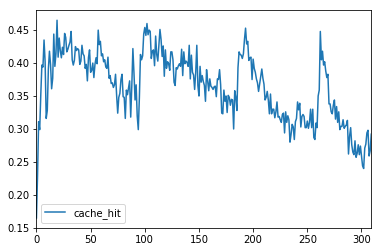

In [5]:
stats_df = pd.read_csv(f'{directory}/cache_hit_logger.log', 
                       names=['timestamp', 'key', 'cache_hit', 'cache_miss'], 
                       usecols=['cache_hit'])
stats_df[['cache_hit']] = stats_df[['cache_hit']].astype(int)
stats_df.groupby((stats_df.index // 1000)).mean().plot()

In [11]:

observation_df = pd.read_csv(f'{caching_strategy_dir}/{name}observation_logger.log',
                             names=['timestamp', 'key', 'observation'],
                             usecols=['observation', 'key'])


observations = observation_df.groupby(('observation', observation_df.index // 114000)).count().unstack(0).fillna(0)['key']

/home/samialab/anaconda3/envs/rlcache/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  import sys


In [9]:
import math
observation_df = pd.read_csv(f'{caching_strategy_dir}/{name}observation_logger.log',
                             names=['timestamp', 'key', 'observation'],
                             usecols=['observation', 'key'])
labels = ['5%', '10%', '25%', '50%', '100%']
# split_num = math.ceil(observation_df.count()['key'] /len(labels))
split_num = 10000
observations = observation_df.groupby(('observation', observation_df.index // split_num)).count().unstack(0).fillna(0)['key']

/home/samialab/anaconda3/envs/rlcache/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  


In [11]:
observations

observation,EvictionPolicy,Expiration,Hit,Invalidate,Miss
0,645.0,0.0,2930.0,494.0,5931.0
1,521.0,1885.0,2675.0,375.0,4544.0
2,977.0,1260.0,3136.0,371.0,4256.0
3,1366.0,1050.0,3071.0,380.0,4133.0
4,1613.0,980.0,2946.0,381.0,4080.0
5,1956.0,765.0,2864.0,347.0,4068.0
6,2270.0,757.0,2633.0,369.0,3971.0
7,2360.0,664.0,2670.0,342.0,3964.0
8,2498.0,624.0,2711.0,331.0,3836.0
9,2675.0,524.0,2490.0,330.0,3981.0


In [ ]:
hit_ratio = observations['Hit']/observations.sum(axis=1)
ax = hit_ratio.plot()
# ax.set_xticklabels(labels * 2)
ax.set_xlabel('Write Ratio')
ax.set_ylabel('Hit Ratio')

In [ ]:
episode_reward_df = pd.read_csv(f'{caching_strategy_dir}/{name}reward_logger.log', names=['timestamp', 'reward'], usecols=['reward'])
episode_reward_df.groupby((episode_reward_df.index // 10000)).sum().plot()

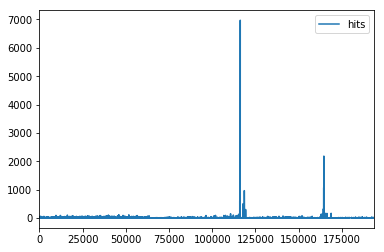

In [16]:
episode_reward_df = pd.read_csv(f'{caching_strategy_dir}/{name}entry_hits_logger.log', names=['timestamp', 
                                                                                              'key', 
                                                                                              'hits'], usecols=['hits'])
episode_reward_df.plot()
